# Introduction and flat files

## Intro

### Exploring your working directory

 In order to import data into Python, you should first have an idea of what files are in your working directory.

IPython, which is running on DataCamp's servers, has a bunch of cool commands, including its magic commands. For example, starting a line with ! gives you complete system shell access. This means that the IPython magic command ! ls will display the contents of your current directory. Y

In [1]:
! ls

1-1_FlatFiles.ipynb ch_1_slides.pdf


### Importing entire text files

In this exercise, you'll be working with the file moby_dick.txt. It is a text file that contains the opening sentences of Moby Dick, one of the great American novels! Here you'll get experience opening a text file, printing its contents to the shell and, finally, closing it.

In [2]:
# Open a file: file
file = open('data/moby_dick.txt', 'r')

# Print it
print(file.read())

# Check whether file is closed
print(file.closed)

# Close file
file.close()

# Check whether file is closed
print(file.closed)

CHAPTER 1. Loomings.
    
Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. I

### Importing text files line by line
For large files, we may not want to print all of their content to the shell: you may wish to print only the first few lines. Enter the readline() method, which allows you to do this. When a file called file is open, you can print out the first line by executing file.readline(). If you execute the same command again, the second line will print, and so on.

In the introductory video, Hugo also introduced the concept of a context manager. He showed that you can bind a variable file by using a context manager construct:
```
with open('huck_finn.txt') as file:
```
While still within this construct, the variable file will be bound to open('huck_finn.txt'); thus, to print the file to the shell, all the code you need to execute is:

```
with open('huck_finn.txt') as file:
    print(file.read())
```
You'll now use these tools to print the first few lines of moby_dick.txt!

In [3]:
# Read & print the first 3 lines
with open('moby_dick.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

CHAPTER 1. Loomings.

    

Call me Ishmael. Some years ago--never mind how long precisely--having



## the Zen of Python

In [4]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## Importing flat files using NumPy

### Using NumPy to import flat files

In this exercise, you're now going to load the MNIST digit recognition dataset using the numpy function loadtxt() and see just how easy it can be:

`loadtext()`
* The first argument will be the filename.
* The second will be the delimiter which, in this case, is a comma.

<class 'numpy.ndarray'>


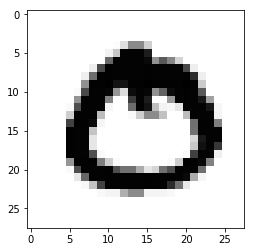

In [7]:
# Import package
import numpy as np
import matplotlib.pyplot as plt

# Assign filename to variable: file
file = 'data/digits.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[23, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()


### Customizing your NumPy import
What if there are rows, such as a header, that we wish to not import? What if our file has a delimiter other than a comma? What if you only wish to import particular columns?

There are a number of arguments that np.loadtxt() takes that you'll find useful: delimiter changes the delimiter that loadtxt() is expecting, for example, ',' and '\t' for comma-delimited and tab-delimited respectively; skiprows allows you to specify how many rows you wish to skip; usecols takes a list of the indices of the columns you wish to keep.

The file that you'll be importing, digits_header.txt

* has a header;
* is tab-delimited.

In [10]:
# Assign the filename: file
file = 'data/digits_header.txt'

# Load the data: data
data = np.loadtxt(file, delimiter='\t', skiprows=1, usecols=[0,2])

# Print data
print(data[:5])

[[ 1.  0.]
 [ 0.  0.]
 [ 1.  0.]
 [ 4.  0.]
 [ 0.  0.]]


### Importing different datatypes

The file seaslug.txt

* has a text header, consisting of strings;
* is tab-delimited.

Due to the header, if you tried to import it as is using np.loadtxt(), Python would throw you a ValueError and tell you that it could not convert string to float. There are two ways to deal with this: firstly, you can set the data type argument dtype equal to 'str' (for string).

Alternatively, you can skip the first row as we have seen before, using the skiprows argument. The data consists of percentage of sea slug larvae that had metamorphosed in a given time period. Read more [here](http://www.stat.ucla.edu/projects/datasets/seaslug-explanation.html).

["b'Time'" "b'Percent'"]
[ 0.     0.357]


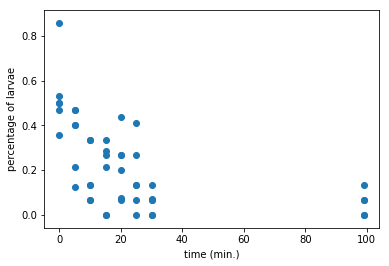

In [11]:
# Assign filename: file
file = 'data/seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()


### Working with mixed datatypes (1)

Much of the time you will need to import datasets which have different datatypes in different columns: one column may contain strings and another floats, for example. The function np.loadtxt() will freak at this. There is another function, np.genfromtxt(), which can handle such structures. If we pass dtype=None to it, it will figure out what types each column should be.

Import 'titanic.csv' using the function np.genfromtxt() as follows:
```
data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)
```
Here, the first argument is the filename, the second specifies the delimiter , and the third argument names tells us there is a header. Because the data are of different types, data is an object called a structured array. Because numpy arrays have to contain elements that are all the same type, the structured array solves this by being a 1D array, where each element of the array is a row of the flat file imported. You can test this by checking out the array's shape in the shell by executing np.shape(data).

Acccessing rows and columns of structured arrays is super-intuitive: to get the ith row, merely execute data[i] and to get the column with name 'Fare', execute data['Fare'].

Print the entire column with name Survived to the shell. What are the last 4 values of this column?

In [13]:
data = np.genfromtxt('data/titanic.csv', delimiter=',', names=True, dtype=None)
print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(891,)


In [14]:
data[1:4]

array([(2, 1, 1, b'female', 38.0, 1, 0, b'PC 17599', 71.2833, b'C85', b'C'),
       (3, 1, 3, b'female', 26.0, 0, 0, b'STON/O2. 3101282', 7.925, b'', b'S'),
       (4, 1, 1, b'female', 35.0, 1, 0, b'113803', 53.1, b'C123', b'S')], 
      dtype=[('PassengerId', '<i8'), ('Survived', '<i8'), ('Pclass', '<i8'), ('Sex', 'S6'), ('Age', '<f8'), ('SibSp', '<i8'), ('Parch', '<i8'), ('Ticket', 'S18'), ('Fare', '<f8'), ('Cabin', 'S15'), ('Embarked', 'S1')])

In [15]:
data['Survived'][-4:]

array([1, 0, 1, 0])

### Working with mixed datatypes (2)
You have just used np.genfromtxt() to import data containing mixed datatypes. There is also another function np.recfromcsv() that behaves similarly to np.genfromtxt(), except that its default dtype is None. In this exercise, you'll practice using this to achieve the same result.

In [17]:
# Assign the filename: file
file = 'data/titanic.csv'

# Import file using np.recfromcsv: d
d = np.recfromcsv(file, delimiter=',', names=True, dtype=None)

# Print out first three entries of d
print(d[:3])

[(1, 0, 3, b'male', 22.0, 1, 0, b'A/5 21171', 7.25, b'', b'S')
 (2, 1, 1, b'female', 38.0, 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26.0, 0, 0, b'STON/O2. 3101282', 7.925, b'', b'S')]


## Importing flat files using pandas

### Using pandas to import flat files as DataFrames (1)
In the last exercise, you were able to import flat files containing columns with different datatypes as numpy arrays. However, the DataFrame object in pandas is a more appropriate structure in which to store such data and thankfully we can easily import files of mixed data types as DataFrames using the pandas functions read_csv() and read_table().z

In [19]:
# Import pandas as pd
import pandas as pd

# Assign the filename: file
file = 'data/titanic.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)

# View the head of the DataFrame
print(df.head())


   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


### Using pandas to import flat files as DataFrames (2)

In the last exercise, you were able to import flat files into a pandas DataFrame. As a bonus, it is then straightforward to retrieve the corresponding numpy array using the attribute values. You'll now have a chance to do this using the MNIST dataset, which is available as digits.csv.

In [20]:
# Assign the filename: file
file = 'data/digits.csv'

# Read the first 5 rows of the file into a DataFrame: data
data = pd.read_csv(file, nrows=5, header=None)

# Build a numpy array from the DataFrame: data_array
data_array = data.values

# Print the datatype of data_array to the shell
print(type(data_array))


<class 'numpy.ndarray'>


### Customizing your pandas import

The pandas package is also great at dealing with many of the issues you will encounter when importing data as a data scientist, such as comments occurring in flat files, empty lines and missing values. Note that missing values are also commonly referred to as NA or NaN. To wrap up this Chapter, you're now going to import a slightly corrupted copy of the Titanic dataset titanic_corrupt.txt, which

* contains comments after the character '#';
* is tab-delimited;

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket    Fare Cabin Embarked  
0         A/5 21171   7.250   NaN       S   
1          PC 17599     NaN   NaN      NaN  
2  STON/O2. 3101282   7.925   NaN        S  
3            113803  53.100  C123        S  
4            373450   8.050   NaN        S  


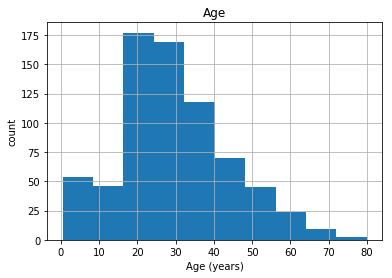

In [21]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Assign filename: file
file = 'data/titanic_corrupt.txt'

# Import file: data
data = pd.read_csv(file, sep='\t', comment='#', na_values=['Nothing'])

# Print the head of the DataFrame
print(data.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()
